<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/AssgDecisionTreeFraudCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [ ]:
data=pd.read_csv("Fraud_check.csv")

In [ ]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
data1=data.copy()

In [ ]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Adding a new column "Tax_Class".
If taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
data1.insert(6,"Tax_Class"," ")

for i in range(0,len(data1["Taxable.Income"]),1):
  if data1["Taxable.Income"].iloc[i]<=30000:
    data1["Tax_Class"].iloc[i]="Risky"
  else:
    data1["Tax_Class"].iloc[i]="Good"


<ipython-input-78-091f0e4dc8cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Tax_Class"].iloc[i]="Good"
<ipython-input-78-091f0e4dc8cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Tax_Class"].iloc[i]="Risky"


In [ ]:
data1=data1.drop("Taxable.Income",axis=1) # removing the column Taxable Income as it si no longer required
data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


Pre processing the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data1["Undergrad"]=Encoder.fit_transform(data1["Undergrad"])
data1["Marital.Status"]=Encoder.fit_transform(data1["Marital.Status"])
data1["Urban"]=Encoder.fit_transform(data1["Urban"])
data1["Tax_Class"]=Encoder.fit_transform(data1["Tax_Class"])

In [ ]:
data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
##data1["Taxable.Income"]=Scaler.fit_transform(data1["Taxable.Income"])
#data1["City.Population"]=Scaler.fit_transform(data1["City.Population"])
#data1["Work.Experience"]=Scaler.fit_transform(data1["Work.Experience"])
data1.iloc[:,2:4]=Scaler.fit_transform(data1.iloc[:,2:4])

In [ ]:
data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0


Divide the data into x and y

In [ ]:
x=data1.iloc[:,:5]
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,-1.178521,-0.629143,1
1,1,0,0.508500,0.276370,1
2,0,1,1.033109,1.634639,1
3,1,2,1.696831,-0.063197,1
4,0,1,-1.630532,1.408261,0


In [ ]:
y=data1["Tax_Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Tax_Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Model=DecisionTreeClassifier(criterion="entropy",max_depth=5)
Model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

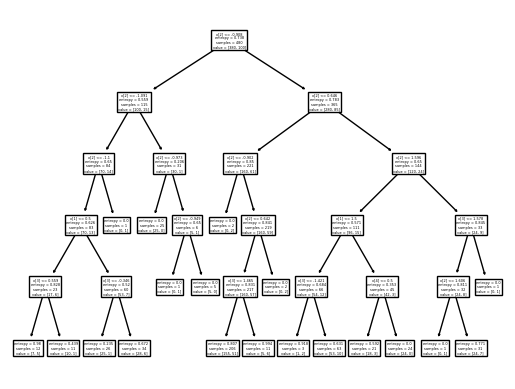

In [ ]:
from sklearn import tree
tree.plot_tree(Model);

Predicting on test data

In [ ]:
preds=Model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [ ]:
y_test.value_counts()

0    96
1    24
Name: Tax_Class, dtype: int64

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.8